初始化输入层与隐藏层权值矩阵W1为:
[[0.30879749 0.3587852  0.77230738 0.75695369 0.98721915]
 [0.51424515 0.85038622 0.19937804 0.17368514 0.69487813]
 [0.51031186 0.09697537 0.05291624 0.53481929 0.84719006]
 [0.92060284 0.8418012  0.98735507 0.93345569 0.4621238 ]]
初始化隐藏层与输出层权值矩阵W2为:
[[0.18745963 0.66591635 0.50813807]
 [0.62289401 0.97642576 0.78536396]
 [0.43597962 0.30428546 0.49344869]
 [0.26980694 0.04004456 0.32884973]
 [0.6984658  0.77263813 0.8844471 ]]
初始化输入层偏置单元权值矩阵B1为:
[[0.70714503 0.39013406 0.69526549 0.94960617 0.6354009 ]]
初始化输入层偏置单元权值矩阵B2为:
[[0.18499085 0.47199416 0.20313325]]
------------------------------------------------------
迭代次数为2000,学习率为0.003
最终输入层与隐藏层权值矩阵W1为:
[[-0.67290847  0.5508137   0.93130528  0.87324005  0.99458855]
 [-1.62706496  0.95441428  0.31518973  0.25498497  0.69978043]
 [ 1.59419412  0.19194246  0.08444721  0.56417618  0.84937668]
 [ 2.19003471  0.86366276  0.98777104  0.93670472  0.46246025]]
最终隐藏层与输出层权值矩阵W2为:
[[-10.91426933   2.46923211   8.42286794]
 [  0.96

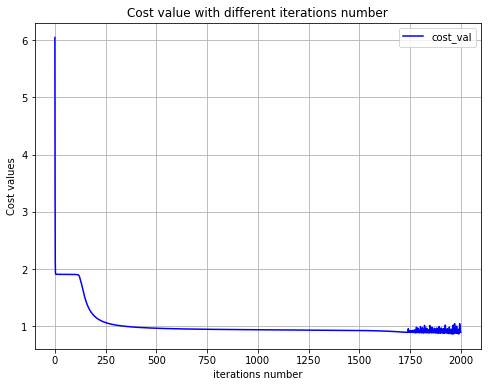

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys#调用系统设置，最大递归深度
sys.setrecursionlimit(1000000)
#数据预处理
datafile = 'data/iris.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2,3),unpack=True)
colstr=np.loadtxt(datafile,delimiter=',',usecols=(4),unpack=False,dtype='str')
#print(cols.shape)
colstr=colstr.reshape((1,150))
#将花的种类分别用0，1，2代替Iris-setosa，Iris-versicolor，Iris-virginica
def transfer_classes(x):
    mask0 = x=='Iris-setosa'
    mask1 = x=='Iris-versicolor'
    mask2 = x=='Iris-virginica'
    x[mask0]='0'
    x[mask1]='1'
    x[mask2]='2'
    x=x.astype(np.float)
    return x
colstr=transfer_classes(colstr)#将字符串类型类别转换为数字类别代替
#print(cols)
#print(colstr)
#print(colstr.shape)
#将数据进行拼接，得到全集
col= np.vstack((cols,colstr))
col = np.transpose(col)
cols = np.transpose(cols)
colstr = np.transpose(colstr)
#初步分析数据,由于为四维数据，一般无法用平面图展示
#设置阈值函数，即激活函数sigmod
def sigmod(z):
    return 1/(1+np.exp(-z))

#定义BP神经网络的功能类
class bp_nn():
    def __init__(self,hide_lawyers,):
        self.num=num
    def pr(self):
        print(self.num)
#这里使用单隐层神经网络，总共有三层，一层输入层，一层隐藏层，一层输出层，输出层3个单元
#这里输入层为150x4矩阵，包含四个单元，不包含偏置层
#设置隐藏层单元数为：5，不包含偏置层
hidden_units = 5
classes = 3#类别为3
#随机初始化权重，权重总共有两个矩阵，总共三层。W1为4x5矩阵，W2为5x3矩阵
#随机初始化权重矩阵
W1=np.random.rand(4,5)
B1=np.random.rand(1,5)
W2=np.random.rand(5,3)
B2=np.random.rand(1,3)
print("初始化输入层与隐藏层权值矩阵W1为:")
print(W1)
print("初始化隐藏层与输出层权值矩阵W2为:")
print(W2)
print("初始化输入层偏置单元权值矩阵B1为:")
print(B1)
print("初始化输入层偏置单元权值矩阵B2为:")
print(B2)
#然后执行前向传播,to get h(x) for any x
def Forward(x,hidden_units,w1,w2,b1,b2):
    #给x加上一列偏置单元，即全为1的一列
    #x = np.insert(x,0,1,axis=1)
    #储存隐藏层,隐藏层为150x5矩阵
    hide_matrix= np.zeros((x.shape[0],hidden_units))
    Z2=np.zeros((x.shape[0],hidden_units))
    #储存输出层，输出层为150x3矩阵
    output_matrix = np.zeros((hide_matrix.shape[0],classes))
    #开始前向传播
    for i in range(x.shape[0]):#依次处理每一个xi
        Z2[i,:]=np.dot(x[i,:],w1)+b1
        hide_matrix[i,:]=sigmod(np.dot(x[i,:],w1)+b1)
    #得到隐藏层
    #继续前向传播，得到输出层h(x)
    #隐藏层加入1层偏置层,全为1的常数列
    #Z2=np.insert(Z2,0,1,axis=1)
    #hide_matrix = np.insert(hide_matrix,0,1,axis=1)
    for i in range(hide_matrix.shape[0]):#依次处理每一个ai
        output_matrix[i,:]=sigmod(np.dot(hide_matrix[i,:],w2)+b2)
    return output_matrix,hide_matrix,Z2#返回h(x)

#output,hidden,Z2= Forward(cols,hidden_units)
#print(Z2.shape)#得到150x3矩阵
#print(hidden.shape)
#计算损失函数Costfuction,未正则化
def computeCost_one(hx,y):#在这里每一项h（x）都是一个三维向量
    #计算每一项的J（theta）
    left,right=0,0
    for i in range(classes):
        left = left+y[i]*(np.log(hx[i]))
        right = right+(1-y[i])*np.log(1-hx[i])
    return left+right

def computeCost(hx,y):
    Cost_v=0
    y1=[1,0,0]
    y2=[0,1,0]
    y3=[0,0,1]
    for i in range(hx.shape[0]):#分别计算每一项
        if y[i]==0:
            Cost_v = Cost_v+computeCost_one(hx[i,:],y1)
        elif y[i]==1:
            Cost_v = Cost_v+computeCost_one(hx[i,:],y2)
        elif y[i]==2:
            Cost_v = Cost_v+computeCost_one(hx[i,:],y3)
    return -1/hx.shape[0]*Cost_v


#print(Cost)
#然后进行反向传播，求偏导

#定义sigmod求偏导函数
def sigmod_gradient(z):
    dummy = sigmod(z)
    return dummy*(1-dummy)
#设置学习率为alpha
alpha = 0.003
def BackP(x,y,out,z2,hide,q1,q2,b1,b2):
    #首先求输出层的误差,对于每一项来说，误差是一个三维向量
    #所以输出层的误差矩阵为
    #x = np.insert(x,0,1,axis=1)
    y1=[1,0,0]
    y2=[0,1,0]
    y3=[0,0,1]
    #对于每一项来说求出δ的值
    delta2=np.zeros((x.shape[0],hidden_units))#代表第二层的δ
    delta3 = np.zeros((x.shape[0],classes))#代表第三层的δ
    for i in range(x.shape[0]):
        if y[i]==0:
            delta3[i,:]=out[i,:]-y1
        elif y[i]==1:
            delta3[i,:]=out[i,:]-y2
        elif y[i]==2:
            delta3[i,:]=out[i,:]-y3
    #然后求出delta2
    delta2 = np.dot(delta3,q2.T)*sigmod_gradient(z2)
    #然后通过公式求出每一个参数关于损失函数的偏导，进行梯度下降
    #print(q1.shape)
    #print(x.shape)
    #print(delta2.shape)
    for i in range(x.shape[0]):
        q1=q1-alpha*np.dot(np.transpose(x[i,:]).reshape((x.shape[1],1)),delta2[i,:].reshape((1,hidden_units)))
        q2=q2-alpha*np.dot(np.transpose(hide[i,:]).reshape(hidden_units,1),delta3[i,:].reshape((1,classes)))
        b1=b1-alpha*delta2[i]
        b2=b2-alpha*delta3[i]
    return q1,q2,b1,b2#返回更新的权值
#print(cols.shape)
#print(hidden.shape)
final_cost=[]
output,hidden,Z2= Forward(cols,hidden_units,W1,W2,B1,B2)
Cost=computeCost(output,colstr)#计算出损失函数的值
final_cost.append(Cost)
new_1,new_2,new_b1,new_b2 = BackP(cols,colstr,output,Z2,hidden,W1,W2,B1,B2)
#print(new_1.shape)
#print(new_2.shape)
#print(new_b1.shape)
#print(new_b2.shape)
#print(delat.shape)    
#设置迭代梯度下降函数
#设置迭代次数
num=2000
final_w1=[]
final_w2=[]
final_b1=[]
final_b2=[]
def iterations(hidden_units,new_1,new_2,new_b1,new_b2,iteration):
    if(iteration==0):
        return 
    else:
        iteration=iteration-1
        output,hidden,Z2= Forward(cols,hidden_units,new_1,new_2,new_b1,new_b2)
        Cost=computeCost(output,colstr)#计算出损失函数的值
        final_cost.append(Cost)
        n1,n2,nb1,nb2 = BackP(cols,colstr,output,Z2,hidden,new_1,new_2,new_b1,new_b2)
        final_w1.append(n1)
        final_w2.append(n2)
        final_b1.append(nb1)
        final_b2.append(nb2)
        iterations(hidden_units,n1,n2,nb1,nb2,iteration)
    
    
iterations(hidden_units,new_1,new_2,new_b1,new_b2,num-1)    
#展示损失函数随迭代次数变化曲线
def plot_cost():
    plt.figure(figsize=(8,6))
    plt.grid(True)
    plt.plot(range(len(final_cost)),final_cost,'b-',label='cost_val')
    plt.xlabel('iterations number')
    plt.ylabel('Cost values')
    plt.legend()
    plt.title('Cost value with different iterations number')
    
#输出初始化参数

plot_cost()
#输出模型最后训练出的模型权值参数
print('------------------------------------------------------')
print("迭代次数为%s,学习率为%s"%(num,alpha))
print("最终输入层与隐藏层权值矩阵W1为:")
print(final_w1[-1])
print("最终隐藏层与输出层权值矩阵W2为:")
print(final_w2[-1])
print("最终输入层偏置单元权值矩阵B1为:")
print(final_b1[-1])
print("最终输入层偏置单元权值矩阵B2为:")
print(final_b2[-1])
print("------------------------------------------------------")
print("最终损失函数的值为%s"%final_cost[-1])
#将该模型进行分类，使用测试数据，
#由于使用的时iris数据集，包含四个数据特征
#print("---------------------鸢尾花测试分类器-------------------------")
test=[]
#test.append(input("花萼长度(cm)"))
#test.append(input("花萼宽度(cm)"))
#test.append(input("花瓣长度(cm)"))
#test.append(input("花瓣宽度度(cm)"))
#test=np.array(test).reshape((1,4))
#test=test.astype(np.float)
print("---------------------------分类结果----------------------------------")
#将数据输入分类器中，最终输出分类结果，即输出使用最终权值的神经网络输出的h（x）
def get_result(test):
    result=[]
    out,hid,zz=Forward(test,hidden_units,final_w1[-1],final_w2[-1],final_b1[-1],final_b2[-1])
    #print(out)
    for i in range(out.shape[0]):
        if(np.argmax(out[i])==0):
            result.append(0)
            #print("该花的种类为：Iris Setosa(山鸢尾)")
        elif(np.argmax(out[i])==1):
            result.append(1)
            #print("该花的种类为：Iris Versicolour(杂色鸢尾)")
        else:
            result.append(2)
            #print("该花的种类为：Iris Virginica(维吉利亚鸢尾)")
    return result
def compare(res,rea):#对比实验结果和真实值
    right = 0
    for i in range(rea.shape[0]):
        if(res[i]==rea[i][0]):
            right =right+1
    return right/rea.shape[0]

#result = get_result(test)
resy=get_result(cols)
fin = compare(resy,colstr)
print("{:.2f}%".format(fin))

In [27]:
resy

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]